In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [9]:
data = 'veggie_heap_training'
test = 'veggie_heap_testing'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=44
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=44
  )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=44
)

Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 2424 files belonging to 12 classes.


In [10]:
alpha = 0.01

cnn = models.Sequential([

    layers.Rescaling(1./255),

    # cnn
    layers.Conv2D(filters = 16, kernel_size = (3,3), input_shape = (256,256,3)),
    layers.LeakyReLU(alpha=alpha),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters = 64, kernel_size = (3,3)),
    layers.LeakyReLU(alpha=alpha),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters = 128, kernel_size = (3,3)),
    layers.LeakyReLU(alpha=alpha),
    layers.MaxPooling2D((3,3)),

    # dense
    layers.Flatten(),
    layers.Dense(128),
    layers.LeakyReLU(alpha=alpha),
    layers.Dense(12, activation = 'softmax'),
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=2
)

Epoch 1/2


179/179 [==============================] - 57s 314ms/step - loss: 0.8973 - accuracy: 0.6956 - val_loss: 0.3007 - val_accuracy: 0.9009
Epoch 2/2
179/179 [==============================] - 60s 337ms/step - loss: 0.2301 - accuracy: 0.9276 - val_loss: 0.1678 - val_accuracy: 0.9436


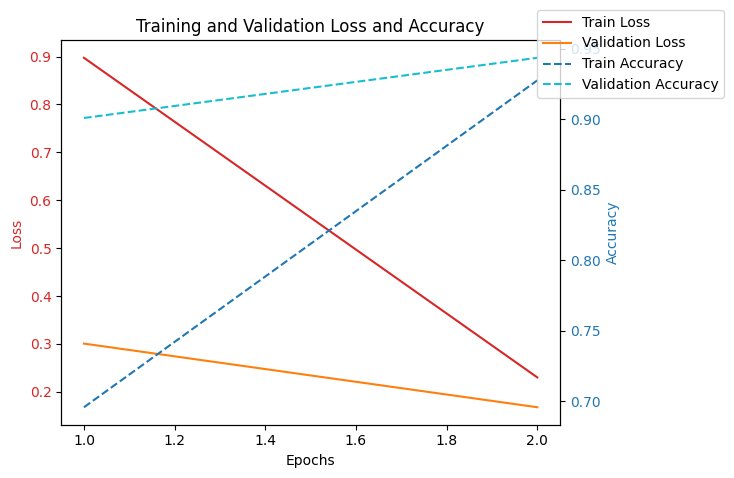

In [13]:
# Extract the history values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plotting the loss on the first axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, label='Train Loss', color='tab:red')
ax1.plot(epochs, val_loss, label='Validation Loss', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create second axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_accuracy, label='Train Accuracy', color='tab:blue', linestyle='dashed')
ax2.plot(epochs, val_accuracy, label='Validation Accuracy', color='tab:cyan', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title
plt.title('Training and Validation Loss and Accuracy')

# Show the legend
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.show()

In [14]:
loss, accuracy = cnn.evaluate(
    test_ds
)

56/56 [==============================] - 5s 90ms/step - loss: 1.0822 - accuracy: 0.7030


In [15]:
#pred = cnn.predict(test_ds)

In [16]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 84, 84, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 82, 82, 64)        9280      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 82, 82, 64)        0         
                                                      

In [17]:
# Function to calculate accuracy
def calculate_accuracy(predictions, true_labels):
    return np.mean(predictions == true_labels)

# Function to get predictions and true labels
def get_predictions_and_labels(model, data_loader):
    predictions = []
    true_labels = []

    for images, labels in data_loader:
        outputs = model(images)
        predicted = np.argmax(outputs, axis=1)
        predictions.extend(predicted)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Calculate predictions and true labels
predictions, true_labels = get_predictions_and_labels(cnn, test_ds)

# Calculate accuracy
accuracy = calculate_accuracy(predictions, true_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


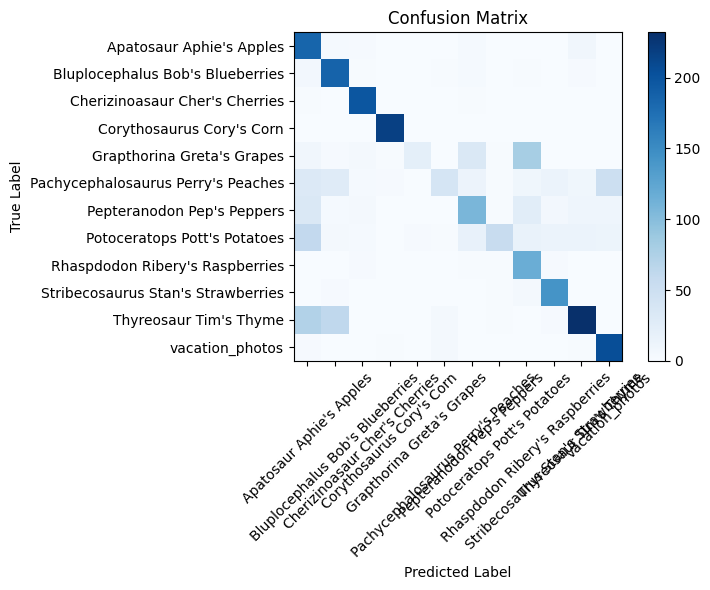

In [18]:
# Get class names
class_names = train_ds.class_names

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [19]:
# Print classification report
print(classification_report(true_labels, predictions, target_names=class_names))

                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.46      0.92      0.62       200
  Bluplocephalus Bob's Blueberries       0.64      0.93      0.76       200
    Cherizinoasaur Cher's Cherries       0.91      0.99      0.95       200
         Corythosaurus Cory's Corn       0.98      1.00      0.99       217
        Grapthorina Greta's Grapes       0.91      0.14      0.24       150
Pachycephalosaurus Perry's Peaches       0.80      0.20      0.31       199
        Pepteranodon Pep's Peppers       0.60      0.54      0.56       200
      Potoceratops Pott's Potatoes       0.90      0.28      0.43       200
   Rhaspdodon Ribery's Raspberries       0.46      0.95      0.62       122
Stribecosaurus Stan's Strawberries       0.79      0.95      0.86       150
            Thyreosaur Tim's Thyme       0.84      0.62      0.71       373
                   vacation_photos       0.74      0.96      0.84       213

          